In [58]:
import numpy as np 
import pandas as pd 

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [60]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [61]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Data Visualizations

<Axes: xlabel='gender', ylabel='count'>

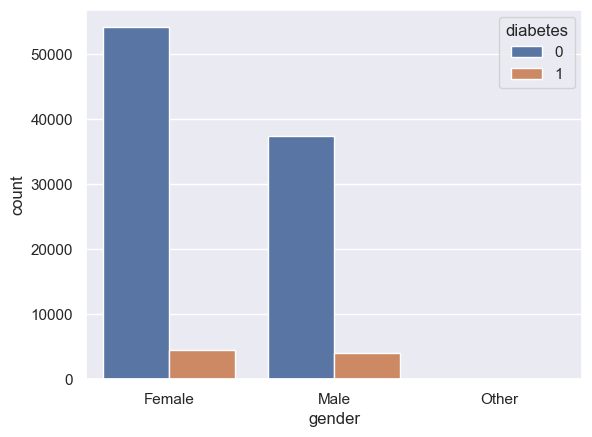

In [63]:
sns.countplot(x=df['gender'],hue=df['diabetes'])

<Axes: xlabel='age', ylabel='Count'>

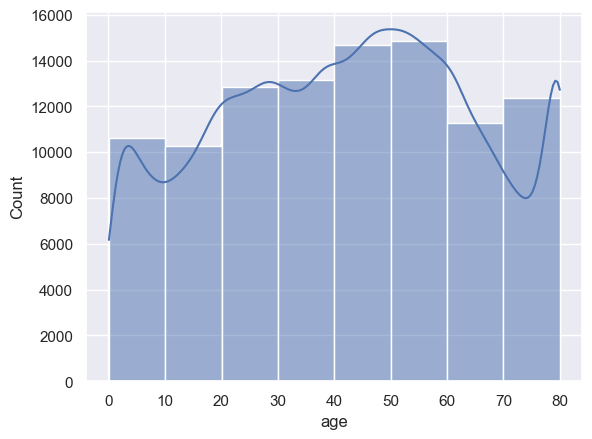

In [64]:
sns.histplot(data=df,x='age',kde=True,bins=8)

<Axes: xlabel='hypertension', ylabel='count'>

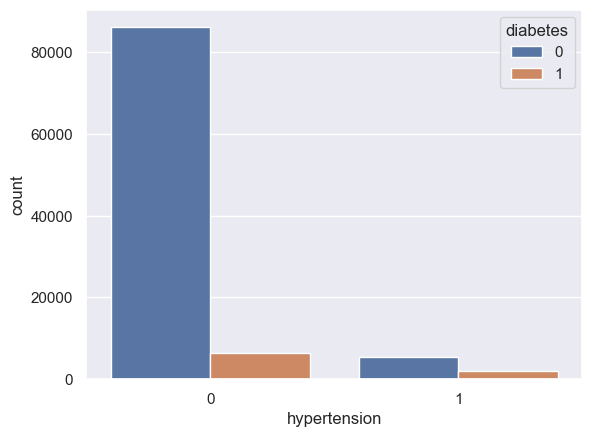

In [65]:
sns.countplot(x=df['hypertension'],hue=df['diabetes'])

<Axes: xlabel='heart_disease', ylabel='count'>

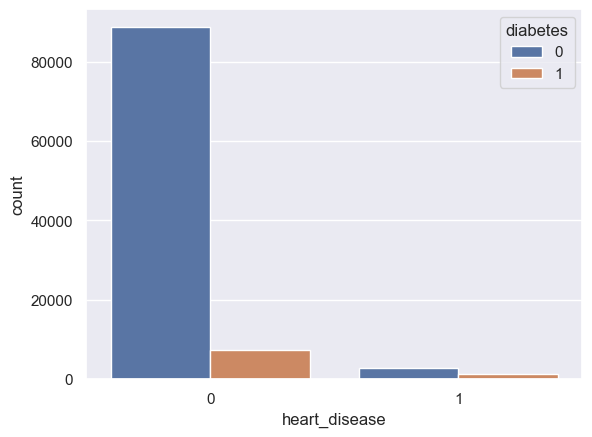

In [66]:
sns.countplot(x=df['heart_disease'],hue=df['diabetes'])

<Axes: xlabel='smoking_history', ylabel='count'>

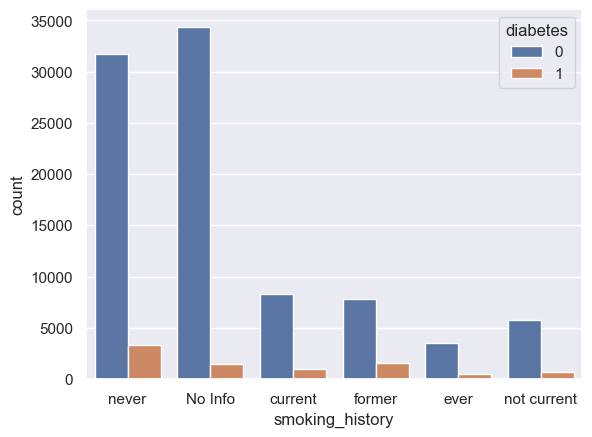

In [67]:
sns.countplot(x=df['smoking_history'],hue=df['diabetes'])

<Axes: xlabel='bmi', ylabel='Count'>

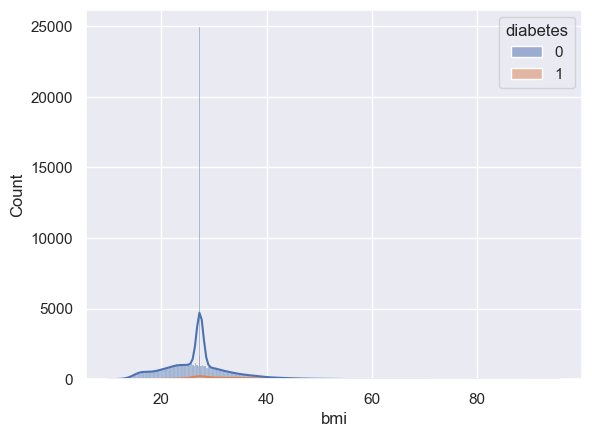

In [68]:
sns.histplot(data=df,x='bmi',hue='diabetes',kde=True)

<Axes: xlabel='HbA1c_level', ylabel='Count'>

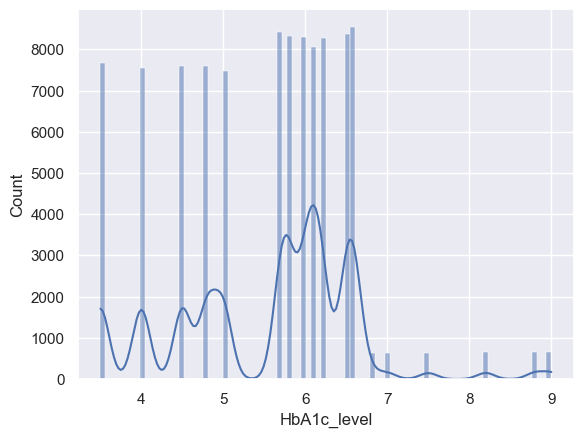

In [69]:
sns.histplot(data=df,x='HbA1c_level',kde=True)

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

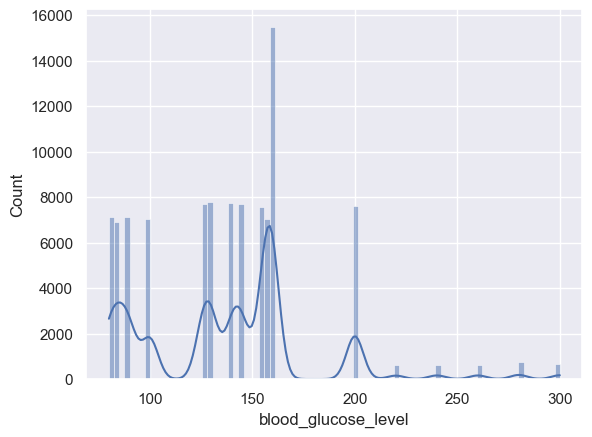

In [70]:
sns.histplot(data=df,x='blood_glucose_level',kde=True)

In [71]:
df['age'].value_counts()

80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: age, Length: 102, dtype: int64

## Handling Age - Continuous to Categorical Coversion 
Appoach and categorization

* 0-9 - Child 
* 10 - 19 - Young Adult 
* 20 - 59 - Adult 
* 60 - 100 - Elderly 




In [72]:
df['age-label'] = pd.cut(x=df['age'],bins=[0,9,19,59,100],labels = ['Child','Young_Adult', 'Adult','Elderly'])

In [73]:
df['age-label'].value_counts()

Adult          55277
Elderly        25055
Young_Adult     9906
Child           9762
Name: age-label, dtype: int64

In [74]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age-label
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult
2,Male,28.0,0,0,never,27.32,5.7,158,0,Adult
3,Female,36.0,0,0,current,23.45,5.0,155,0,Adult
4,Male,76.0,1,1,current,20.14,4.8,155,0,Elderly


Plot the field

<Axes: xlabel='age-label', ylabel='count'>

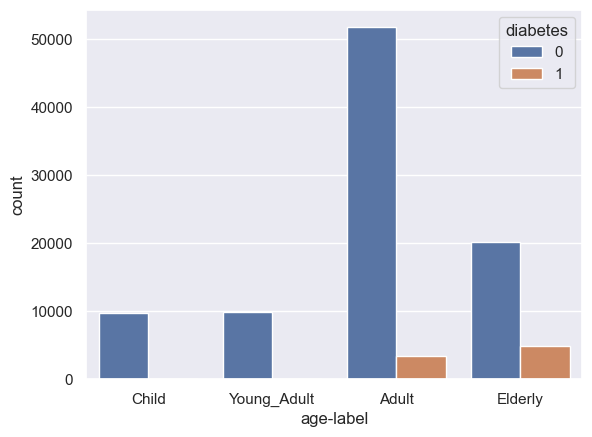

In [75]:
sns.countplot(x=df['age-label'],hue=df['diabetes'])

In [76]:
## Drop the Age Column
df.drop(['age'],axis=1,inplace=True)

In [77]:
df.head(5)

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age-label
0,Female,0,1,never,25.19,6.6,140,0,Elderly
1,Female,0,0,No Info,27.32,6.6,80,0,Adult
2,Male,0,0,never,27.32,5.7,158,0,Adult
3,Female,0,0,current,23.45,5.0,155,0,Adult
4,Male,1,1,current,20.14,4.8,155,0,Elderly


In [78]:
## Ensuring no Missing Values 
missing_df = df.isna().mean(axis=0)
missing_df

gender                 0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
age-label              0.0
dtype: float64

## Prepare for Data Transformation

Changing the categorical values to category type column

In [79]:
df['hypertension']=df['hypertension'].astype('category')
df['heart_disease']=df['heart_disease'].astype('category')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  object  
 1   hypertension         100000 non-null  category
 2   heart_disease        100000 non-null  category
 3   smoking_history      100000 non-null  object  
 4   bmi                  100000 non-null  float64 
 5   HbA1c_level          100000 non-null  float64 
 6   blood_glucose_level  100000 non-null  int64   
 7   diabetes             100000 non-null  int64   
 8   age-label            100000 non-null  category
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [81]:
## Separating the dependent and independent variables 
X = df.drop(['diabetes'],axis=1)
y=df['diabetes']

In [82]:
## Separate the Categorical and Numerical Columns 

cat_cols = X.select_dtypes(exclude=np.number).columns
num_cols = X.select_dtypes(include=np.number).columns

## Implement Pipeline and Column Transformation 

In [83]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline

In [84]:
category_pipeline = Pipeline(
    steps=[
        ("one_hotencoding",OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse=True))
    ]

)

In [85]:
numeric_pipeline = Pipeline(
    steps=[
        ('scaling',StandardScaler())
    ]
)

In [86]:
from sklearn.compose import ColumnTransformer

In [87]:
full_processor = ColumnTransformer(
    transformers=[
        ('numeric',numeric_pipeline,num_cols),
        ('categorical',category_pipeline,cat_cols)
    ]
)

In [88]:
X_preprocessed = full_processor.fit_transform(X)

c:\Users\Alif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Separate Test and Train Data 

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.20, random_state=42)

## Implementing Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lc_reg = LogisticRegression()

In [93]:
log_pred = lc_reg.fit(X_train,y_train)
log_predict = log_pred.predict(X_test)

c:\Users\Alif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
## Impklementing Clazssification Report and Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,log_predict))
print('\n\n')
print(classification_report(y_test,log_predict))

[[18140   152]
 [  665  1043]]



              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



* Decent Accuracy at 96%
* Good Precision and recall for 0 (96% and 99%)
* Not great numbers for 1 (87% and 61%) - may be due to imbalance 
* F1 score for 0 is good at 98% but not good for 1 at 71% - Can form the baseline 

Can be treated as a baseline for other models

## Random Forest Classification

In [95]:
from sklearn.ensemble import RandomForestClassifier
rm_forest = RandomForestClassifier()
rf_predict = rm_forest.fit(X_train,y_train).predict(X_test)

In [96]:
print(confusion_matrix(y_test,rf_predict))
print('\n\n')
print(classification_report(y_test,rf_predict))

[[18182   110]
 [  511  1197]]



              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.92      0.70      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



* Better Accuracy at 97%
* Good Precision and recall for 0 (97% and 99%) compared to Logistic Regression
* Better numbers for 1 (91% and 69%) compared to Logistic Regression
* F1 score for 0 is good at 98% but not good for 1 at 79% 


## Checking Imbalance 

In [97]:
df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [98]:
## Checking Imbalance 
percent_imbalance = len(df[df['diabetes']==1])/len(df[df['diabetes']==0])*100
percent_imbalance

9.289617486338798

## as the imbalance is less than 10% we will attempt to handle imbalance 

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
sm = SMOTE(random_state=2)

In [101]:
x_smote,y_smote = sm.fit_resample(X_preprocessed,y)

## Classification using Logistic Regression for Balanced Sample

In [102]:
## Splitting the test and train data based on the same parameters 

X1_train, X1_test, y1_train, y1_test = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)

In [103]:
lc_reg1 = LogisticRegression()
log_pred1 = lc_reg1.fit(X1_train,y1_train)
log_predict1 = log_pred1.predict(X1_test)

c:\Users\Alif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
from sklearn.linear_model import LogisticRegression
import joblib

# Inisialisasi model
lc_reg1 = LogisticRegression()

# Latih model dengan data pelatihan
lc_reg1.fit(X1_train, y1_train)

# Simpan model yang dilatih menggunakan joblib
joblib.dump(lc_reg1, 'Diabetes.pkl')
import joblib

# Muat model yang dilatih menggunakan joblib
loaded_model = joblib.load('Diabetes.pkl')

# Gunakan model yang dimuat untuk membuat prediksi
predictions = loaded_model.predict(X1_test)


c:\Users\Alif\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
print(confusion_matrix(y1_test,log_predict1))
print('\n\n')
print(classification_report(y1_test,log_predict1))

[[16198  2095]
 [ 2315 15992]]



              precision    recall  f1-score   support

           0       0.87      0.89      0.88     18293
           1       0.88      0.87      0.88     18307

    accuracy                           0.88     36600
   macro avg       0.88      0.88      0.88     36600
weighted avg       0.88      0.88      0.88     36600



* Looking at the support column shows the data is balanced 
* Shows a decrease in recision, recall and f1 score 
* decrease in accuracy 

need to check random forest

## Classification using Random Forest for balanced Data

In [106]:
rm_forest1 = RandomForestClassifier()
rf_predict1 = rm_forest1.fit(X1_train,y1_train).predict(X1_test)

In [107]:
print(confusion_matrix(y1_test,rf_predict1))
print('\n\n')
print(classification_report(y1_test,rf_predict1))

[[17775   518]
 [  524 17783]]



              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18293
           1       0.97      0.97      0.97     18307

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600



In [108]:
import joblib
import pickle

# Save the trained model using joblib
joblib.dump(rm_forest1, 'random_forest_model.pkl')

# Load the saved model using joblib
loaded_model_joblib = joblib.load('random_forest_model.pkl')

# Save the trained model using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rm_forest1, file)

# Load the saved model using pickle
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)


* Very high overall score in terms of precision, recall and f1 score 
* balanced data

Will check the AUC numbers for each model 

## Calculate AUC for each of the 4 Models 

Logistic Regression on Imbalanced Data

In [109]:
from sklearn.metrics import roc_auc_score

In [110]:
pred_prob1 = lc_reg.predict_proba(X_test)

In [111]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print('AUC Score Logistic Regression on imbalanced Data',auc_score1)

AUC Score Logistic Regression on imbalanced Data 0.9591353811010662


Random Forest on Imbalanced Data 

In [112]:
pred_prob2 = rm_forest.predict_proba(X_test)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print('AUC Score Random Forest on imbalanced Data ',auc_score2)

AUC Score Random Forest on imbalanced Data  0.9536958446917069


Logistic Regression on Balanced Data 

In [113]:
pred_prob3 = lc_reg1.predict_proba(X1_test)
auc_score3 = roc_auc_score(y1_test, pred_prob3[:,1])
print('AUC Score for Logistic Regression on balanced Data ',auc_score3)

AUC Score for Logistic Regression on balanced Data  0.9593743766888962


Random Forest on Balanced Data

In [114]:
pred_prob4 = rm_forest1.predict_proba(X1_test)
auc_score4 = roc_auc_score(y1_test, pred_prob4[:,1])
print('AUC Score for Random Forest Balanced Data ',auc_score4)

AUC Score for Random Forest Balanced Data  0.9956763035269459


Conclusion 

* Balancing the Data gave significant improvement on the model performance 
* AUC score of 99.5% for Random forest model on balanced data 

Improvements that can be worked on

* Need to check the numbers for XBoost of balanced data and compare with Randon forest.

Critical analysis is always welcome 

